<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/9_SurvivalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install lifelines

In [46]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Example 1: Recidivism

The data pertain to 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid; half did not receive aid.

In [47]:
from lifelines.datasets import load_rossi

In [48]:
data = load_rossi()

In [49]:
data.columns

Index(['week', 'arrest', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio'], dtype='object')

In [50]:
data=data[['fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio','week','arrest']]   # Ordenar el data set data=[X,T,E]  = EN Ml clasico X=X+T

In [51]:
data

,fin,age,race,wexp,mar,paro,prio,week,arrest
0,0,27,1,0,0,1,3,20,1
1,0,18,1,0,0,1,8,17,1
2,0,19,0,1,0,1,13,25,1
3,1,23,1,1,1,1,1,52,0
4,0,19,0,1,0,1,3,52,0
...,...,...,...,...,...,...,...,...,...
427,1,31,0,1,0,1,3,52,0
428,0,20,1,0,0,1,1,52,0
429,1,20,1,1,1,1,1,52,0
430,0,29,1,1,0,1,3,52,0


## Data Exploration

In [52]:
data.describe()

,fin,age,race,wexp,mar,paro,prio,week,arrest
count,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796,45.854167,0.263889
std,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068,12.662293,0.441251
min,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,50.000000,0.000000
50%,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000,52.000000,0.000000
75%,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000,52.000000,1.000000
max,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000,52.000000,1.000000


In [53]:
pd.crosstab(data.fin,data.arrest,margins=True)

arrest,0,1,All
fin,,,
0,150,66,216
1,168,48,216
All,318,114,432


In [54]:
100*pd.crosstab(data.fin,data.arrest,normalize='index').round(4)

arrest,0,1
fin,,
0,69.44,30.56
1,77.78,22.22


In [55]:
data[(data.arrest==1)&(data.fin==1)]  # Las personas que reincidieron y reciben financiamiento
data[(data.arrest==1)&(data.fin==0)]  # Las personas que reincidieron y no reciben financiamiento

# Observar la media de las semanas que la reincidencia ocurre.

,fin,age,race,wexp,mar,paro,prio,week,arrest
0,0,27,1,0,0,1,3,20,1
1,0,18,1,0,0,1,8,17,1
2,0,19,0,1,0,1,13,25,1
6,0,25,1,1,1,1,0,23,1
12,0,17,1,1,0,1,5,37,1
...,...,...,...,...,...,...,...,...,...
410,0,20,0,1,0,0,1,27,1
414,0,21,1,0,0,0,0,52,1
416,0,18,1,1,0,0,1,4,1
417,0,33,1,1,0,1,2,52,1


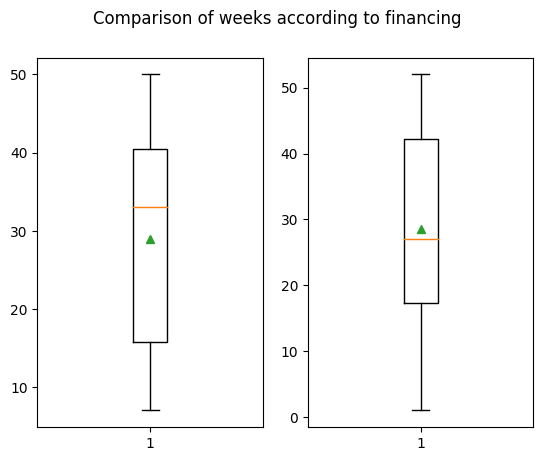

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison of weeks according to financing')
ax1.boxplot(data[(data.arrest==1)&(data.fin==1)].week,showfliers=False,showmeans=True)
ax2.boxplot(data[(data.arrest==1)&(data.fin==0)].week,showfliers=False,showmeans=True)
plt.show()

In [57]:
dd=data[(data.arrest==1)&(data.fin==1)]
dd0=data[(data.arrest==1)&(data.fin==0)]

In [58]:
print(dd.week.mean())
print(dd0.week.mean())

28.9375
28.545454545454547


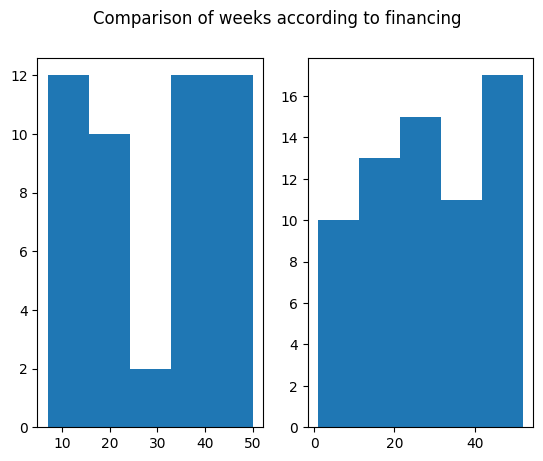

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison of weeks according to financing')
ax1.hist(data[(data.arrest==1)&(data.fin==1)].week,bins=5)
ax2.hist(data[(data.arrest==1)&(data.fin==0)].week,bins=5)
plt.show()

In [60]:
data_sample=data.sample(6,random_state=123)

In [61]:
data_sample

,fin,age,race,wexp,mar,paro,prio,week,arrest
13,0,37,1,1,0,0,2,52,0
295,0,25,1,0,0,0,2,52,0
308,0,19,1,1,0,1,3,52,0
199,0,20,0,0,0,0,2,52,0
421,1,21,1,1,0,1,4,8,1
249,0,19,1,0,0,1,3,32,1


[]

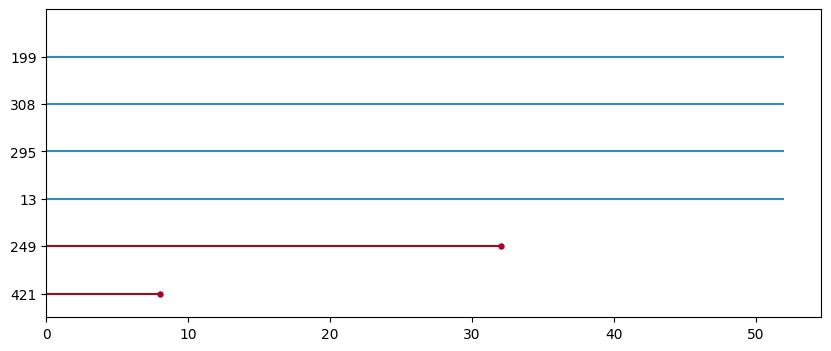

In [62]:
plt.figure(figsize=(10,4))
time = data_sample.week
event = data_sample.arrest
lifelines.plotting.plot_lifetimes(durations=time, event_observed=event)
plt.plot()

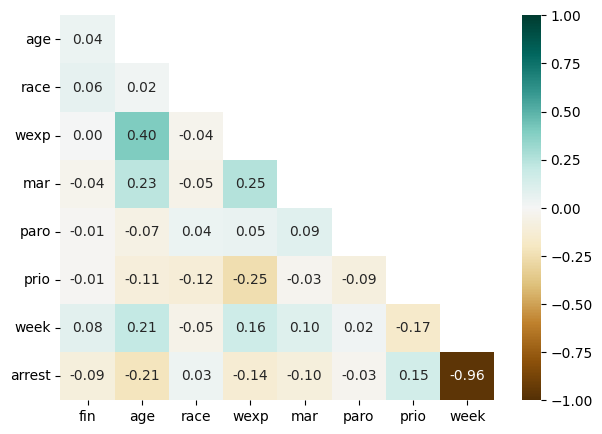

In [63]:
df_corr = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(7,5))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='BrBG',
           vmin=-1, vmax=1, cbar_kws={"shrink": 1})
#    sns.set(font_scale=1)
# yticks
plt.yticks(rotation=0)
plt.show()

## Kaplan-Meier estimator

Text(0.5, 1.0, 'Survival Curve')

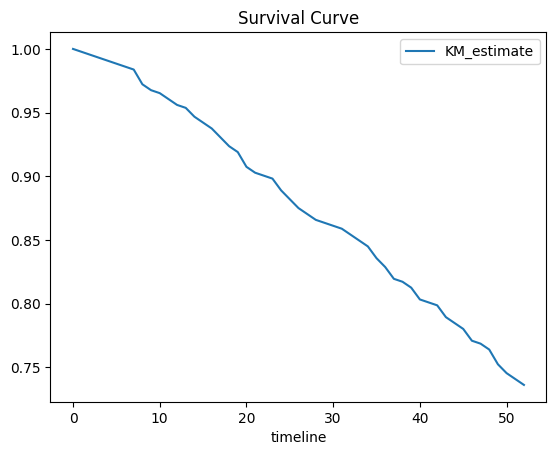

In [64]:
kmf = lifelines.KaplanMeierFitter()

T = data.week
E = data.arrest
kmf.fit(T, E)
kmf.survival_function_.plot()
plt.title('Survival Curve')
#plt.ylim(0,1);

<Axes: xlabel='timeline'>

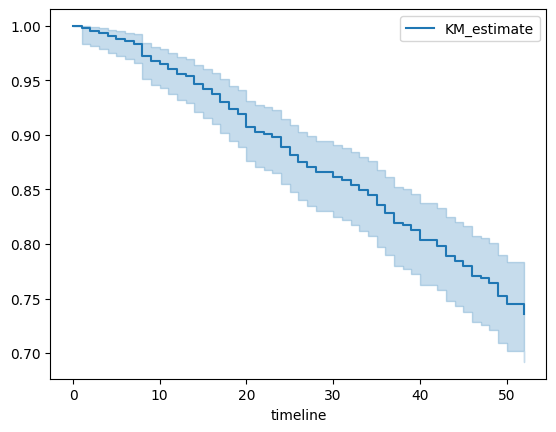

In [65]:
kmf.plot()

In [66]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,432,432
1.0,1,1,0,0,432
2.0,1,1,0,0,431
3.0,1,1,0,0,430
4.0,1,1,0,0,429
5.0,1,1,0,0,428
6.0,1,1,0,0,427
7.0,1,1,0,0,426
8.0,5,5,0,0,425


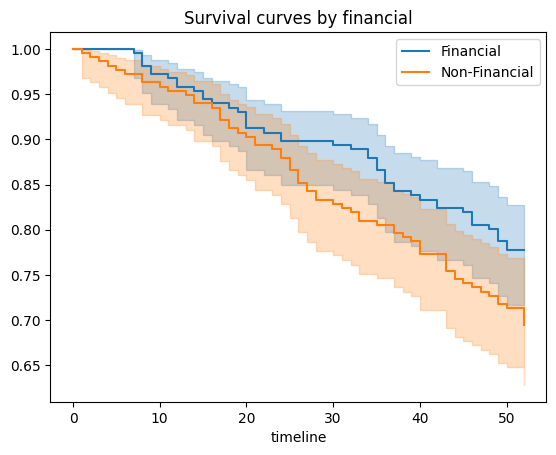

In [67]:
# H0: S1(t)=S2(t)
# Ha: S1(t)<>S2(t)

ax = plt.subplot(111)

opc = (data["fin"] == 1)

kmf.fit(T[opc], event_observed=E[opc], label="Financial")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~opc], event_observed=E[~opc], label="Non-Financial")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by financial");

In [68]:
from lifelines.statistics import logrank_test

In [69]:
results = logrank_test(T[opc], T[~opc], E[opc], E[~opc], alpha=.95)


In [70]:
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.84 0.05      4.32

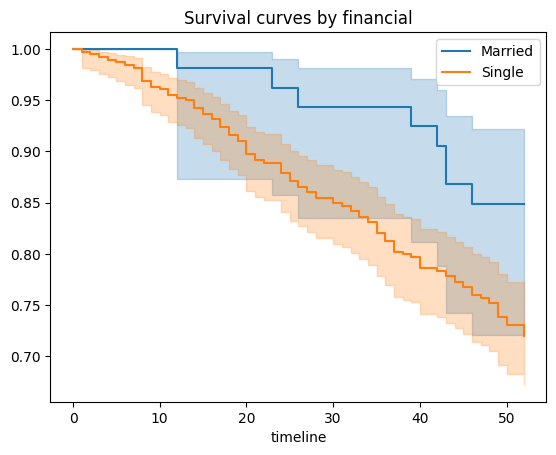

In [71]:
# H0: El riesgo de reincidir en solteros y casados es similar
# Ha: El riesgo de reincidir en solteros y casados no es similar

ax = plt.subplot(111)

opc = (data["mar"] == 1)

kmf.fit(T[opc], event_observed=E[opc], label="Married")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~opc], event_observed=E[~opc], label="Single")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by financial");

In [72]:
results = logrank_test(T[opc], T[~opc], E[opc], E[~opc], alpha=.95)
print(results.p_value.round(3))

0.047


## Cox Proportional Hazards Regression

In [73]:
data.head()

,fin,age,race,wexp,mar,paro,prio,week,arrest
0,0,27,1,0,0,1,3,20,1
1,0,18,1,0,0,1,8,17,1
2,0,19,0,1,0,1,13,25,1
3,1,23,1,1,1,1,1,52,0
4,0,19,0,1,0,1,3,52,0


In [74]:
from lifelines import CoxPHFitter

In [76]:
cph = CoxPHFitter()
cph.fit(data, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [32]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-12-18 22:45:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

<Axes: xlabel='log(HR) (95% CI)'>

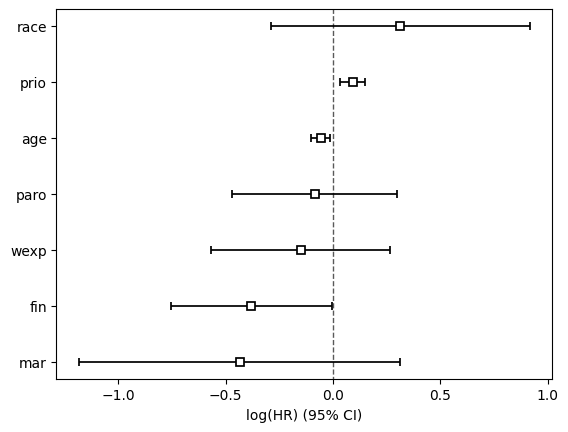

In [33]:
cph.plot()

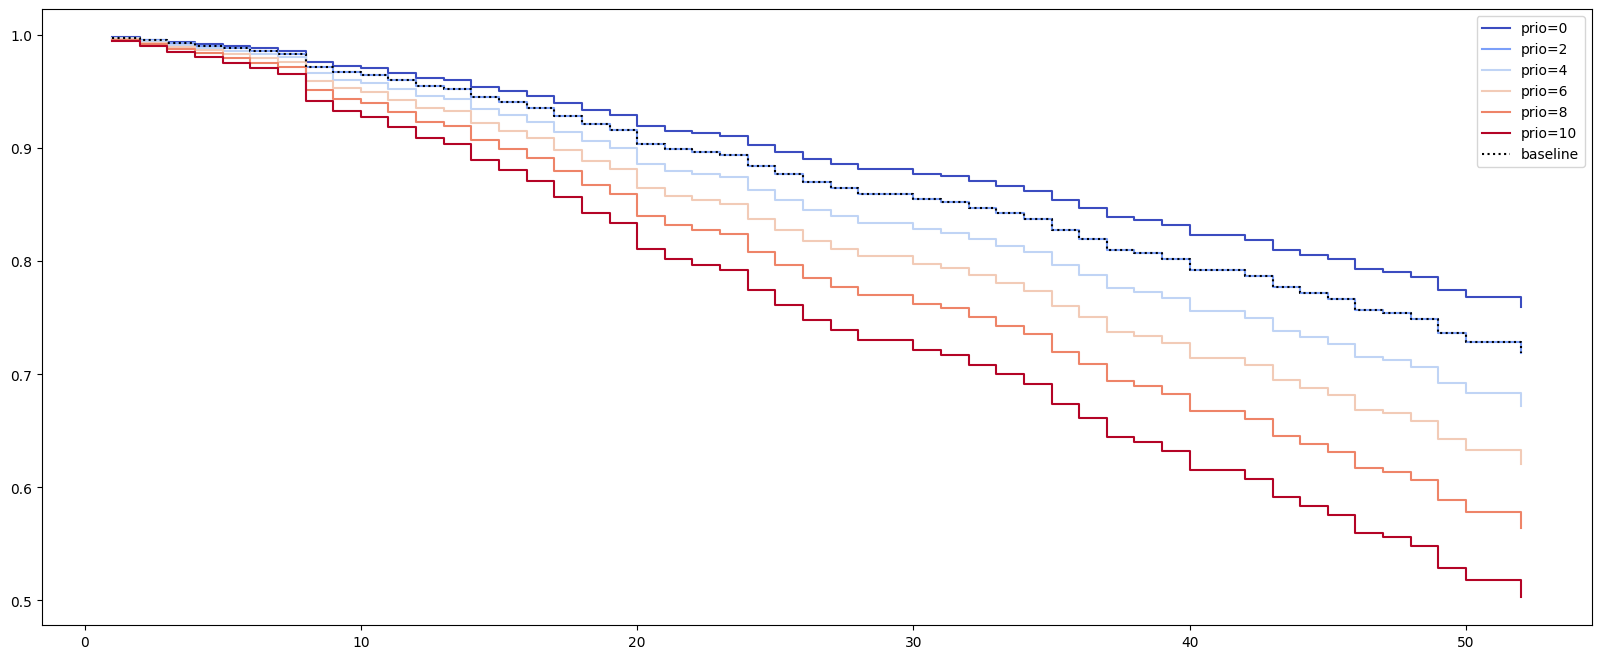

In [34]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm',figsize=(20,8))
plt.show()

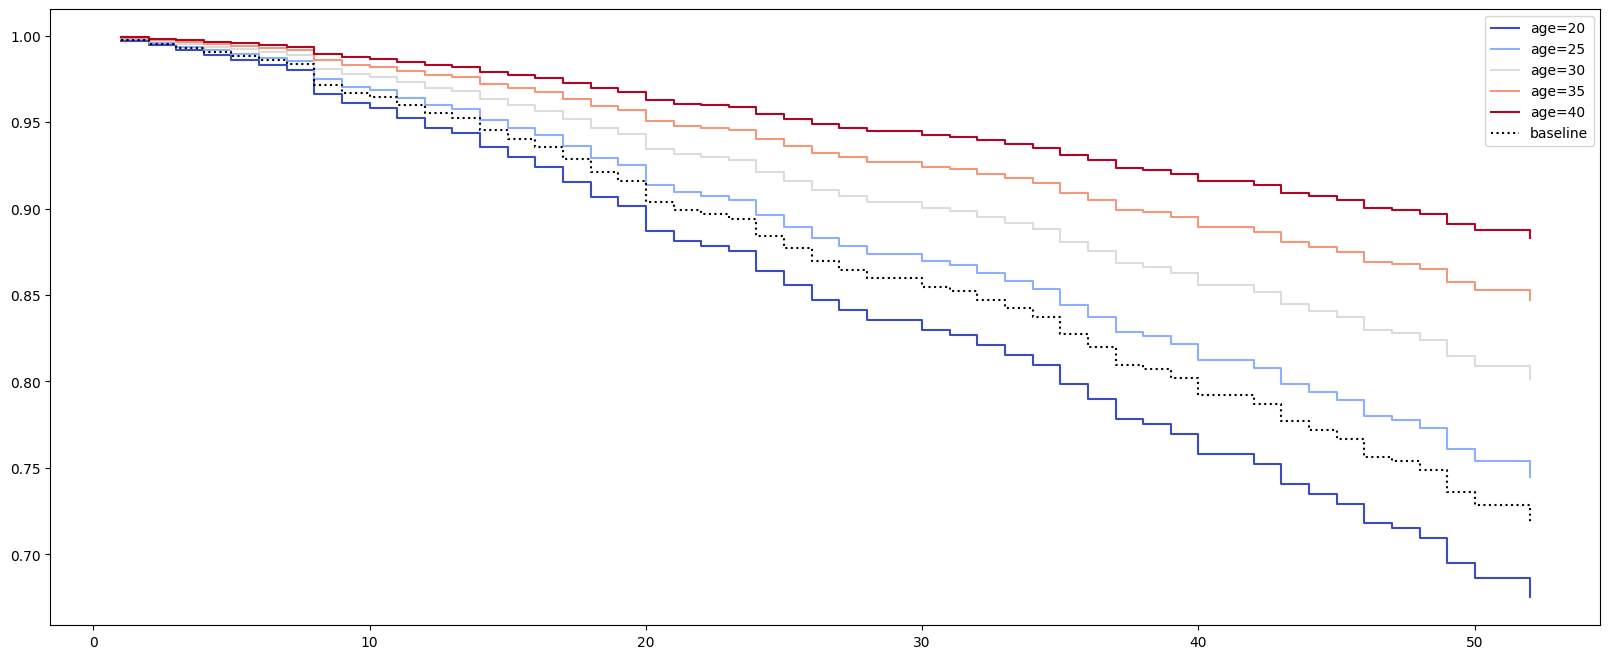

In [35]:
cph.plot_partial_effects_on_outcome(covariates='age', values=[20, 25, 30,35,40], cmap='coolwarm',figsize=(20,8))
plt.show()

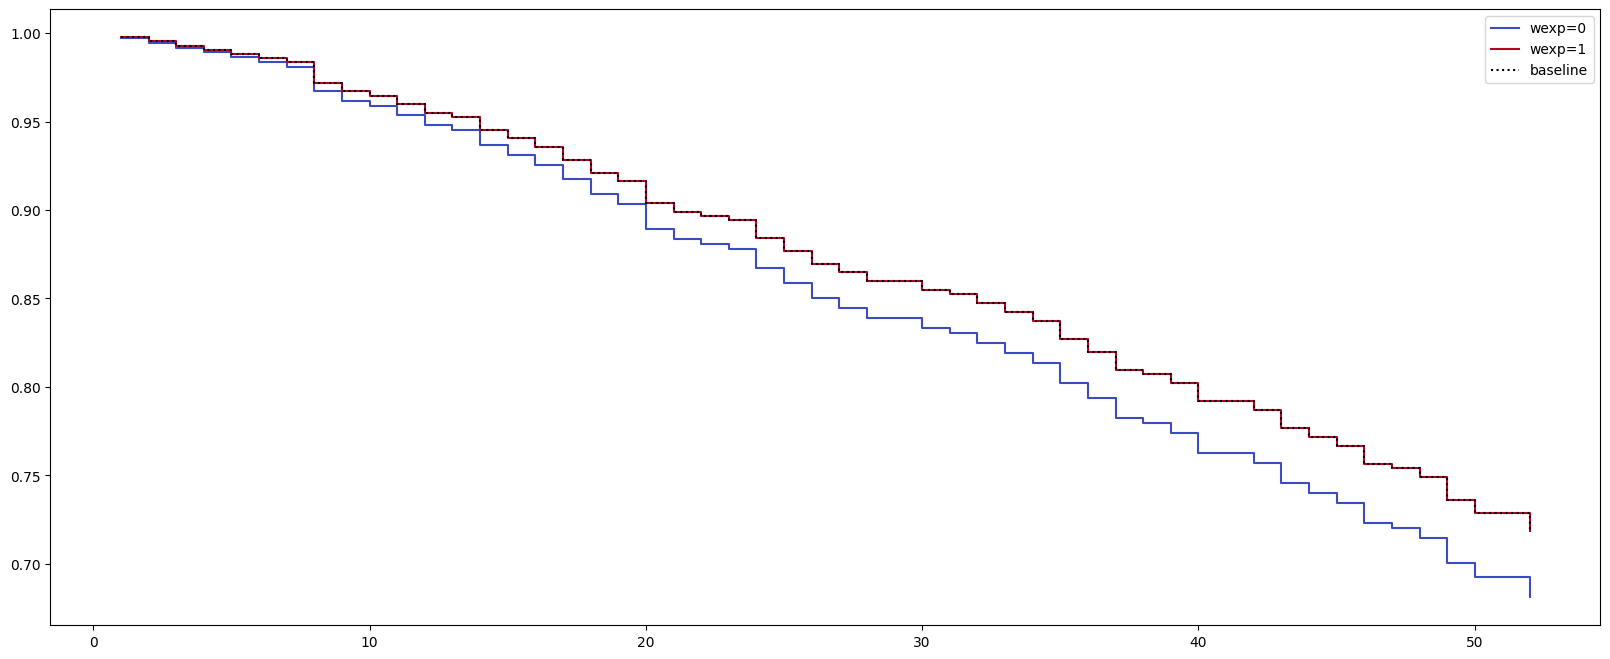

In [36]:
cph.plot_partial_effects_on_outcome(covariates='wexp', values=[0, 1], cmap='coolwarm',figsize=(20,8))
plt.show()

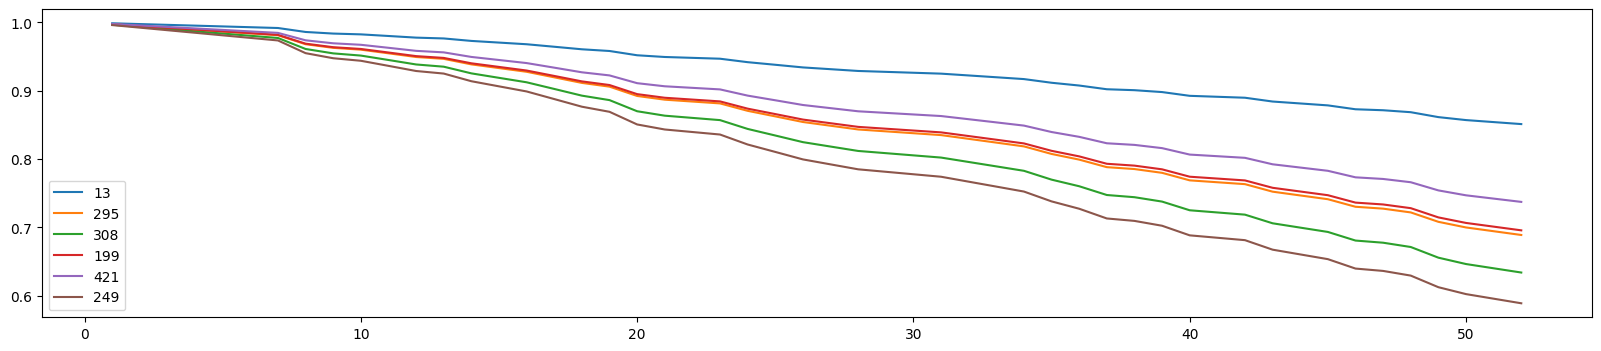

In [37]:
plt.figure(figsize=(20,4))
surv_func = cph.predict_survival_function(data_sample)
exp_lifetime = cph.predict_expectation(data_sample)
plt.plot(surv_func)
plt.legend(surv_func.columns)
plt.show()

A pesar que el individuo 421 tiene una mejor curva de supervivencia encontramos que fue arrestado a los 2 meses de salir de prision.

In [38]:
data_sample

,fin,age,race,wexp,mar,paro,prio,week,arrest
13,0,37,1,1,0,0,2,52,0
295,0,25,1,0,0,0,2,52,0
308,0,19,1,1,0,1,3,52,0
199,0,20,0,0,0,0,2,52,0
421,1,21,1,1,0,1,4,8,1
249,0,19,1,0,0,1,3,32,1


In [39]:
pd.concat([data_sample,pd.DataFrame(exp_lifetime)],axis=1)

,fin,age,race,wexp,mar,paro,prio,week,arrest,0
13,0,37,1,1,0,0,2,52,0,47.611091
295,0,25,1,0,0,0,2,52,0,43.641913
308,0,19,1,1,0,1,3,52,0,42.217014
199,0,20,0,0,0,0,2,52,0,43.814982
421,1,21,1,1,0,1,4,8,1,44.860868
249,0,19,1,0,0,1,3,32,1,41.013329


# Example 2: Leukemia

In [40]:
from lifelines.datasets import load_leukemia

In [41]:
data = load_leukemia()
data.head()

,t,status,sex,logWBC,Rx
0,35,0,1,1.45,0
1,34,0,1,1.47,0
2,32,0,1,2.20,0
3,32,0,1,2.53,0
4,25,0,1,1.78,0


# Example 3: Customer Churn

In [42]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/'
                         'treselle-systems/customer_churn_analysis/'
                         'master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')